# Trao An huy 22280041  NLP  transformers_application WEEK 6

In [ ]:
!pip install datasets transformers

In [ ]:
!pip install fsspec==2023.6.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2023.6.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-nvrtc-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64

# Mini-project 1

Apply Transformers & its variants for a text classification problem.

## Problem statement
- Given a set of Transformers variants and a text classification dataset. Your task is to make a complete pipeline from input to output.
- Your pipeline **SHOULD** include the following required components. Each component **SHOULD** be organized into different `class` object.
    - Load & discover dataset
    - Preprocess data
    - Tokenize data
    - Create a DataLoader
    - Build or load model
    - Create a training workflow
    - Set up hyperparameters for training procedure
    - Train model
    - Evaluate model
    - Infer model


## Dataset demonstration
In this project, we would conduct classification on [IMDb dataset](https://ai.stanford.edu/~amaas/data/sentiment/), which is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. This dataset provides a set of 25 000 highly polar movie reviews for training, and 25 000 for testing. There is additional unlabeled data for use as well. Raw text and already processed bag of words formats are provided.

In [ ]:
from datasets import load_dataset

In [ ]:
imdb_dataset = load_dataset("imdb")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

### Train set

In [ ]:
imdb_train_set = imdb_dataset["train"]
imdb_train_set

Dataset({
    features: ['text', 'label'],
    num_rows: 25000
})

In [ ]:
imdb_train_set[0]

{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

### Test set

In [ ]:
imdb_test_set = imdb_dataset["test"]
imdb_test_set

Dataset({
    features: ['text', 'label'],
    num_rows: 25000
})

In [ ]:
imdb_test_set[0]

{'text': 'I love sci-fi and am willing to put up with a lot. Sci-fi movies/TV are usually underfunded, under-appreciated and misunderstood. I tried to like this, I really did, but it is to good TV sci-fi as Babylon 5 is to Star Trek (the original). Silly prosthetics, cheap cardboard sets, stilted dialogues, CG that doesn\'t match the background, and painfully one-dimensional characters cannot be overcome with a \'sci-fi\' setting. (I\'m sure there are those of you out there who think Babylon 5 is good sci-fi TV. It\'s not. It\'s clichéd and uninspiring.) While US viewers might like emotion and character development, sci-fi is a genre that does not take itself seriously (cf. Star Trek). It may treat important issues, yet not as a serious philosophy. It\'s really difficult to care about the characters here as they are not simply foolish, just missing a spark of life. Their actions and reactions are wooden and predictable, often painful to watch. The makers of Earth KNOW it\'s rubbish as 

## List of models for this project

In [ ]:
import torch
from torch import nn

### BERT
- BERT is a deep learning language model designed to improve the efficiency of natural language processing (NLP) tasks. It is famous for its ability to consider context by analyzing the relationships between words in a sentence bidirectionally. It was introduced by Google researchers in a 2018 paper titled “BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding.” Since then, the BERT model has been fine-tuned for use in a variety of fields, including biology, data science, and medicine.

- You could discover [BERT documentation](https://huggingface.co/docs/transformers/en/model_doc/bert) from transformers library @ Huggingface for more details.

- Examples of training use case for Huggingface model: [Huggingface training](https://huggingface.co/docs/transformers/en/training)

In [ ]:
from transformers import (
    BertForSequenceClassification,
    BertTokenizer
)

In [ ]:
# Load tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',
                                          do_lower_case=True)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
example = imdb_train_set[0]['text']
print(' Original: ', example)

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(example))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(example)))

 Original:  I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far 

In [ ]:
# Load model
bert_model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels = 1
)

bert_model

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
# QC
example_tensor = torch.ones(1, 512).type(torch.long)
example_bert_output = bert_model(example_tensor)
example_bert_output

SequenceClassifierOutput(loss=None, logits=tensor([[0.1746]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

### XLNet

The XLNet model was proposed in XLNet: Generalized Autoregressive Pretraining for Language Understanding by ([Yang et al., 2019](https://arxiv.org/pdf/1906.08237)). XLnet is an extension of the Transformer-XL model pre-trained using an autoregressive method to learn bidirectional contexts by maximizing the expected likelihood over all permutations of the input sequence factorization order.

In [ ]:
from transformers import XLNetTokenizer, XLNetForSequenceClassification

In [ ]:
tokenizer = XLNetTokenizer.from_pretrained('xlnet-base-cased', do_lower_case=True)

tokenized_texts = imdb_train_set[0]['text']
tokenizer(tokenized_texts)

spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/760 [00:00<?, ?B/s]

{'input_ids': [17, 150, 14210, 17, 150, 569, 8595, 13, 27886, 40, 94, 894, 1515, 149, 20, 71, 18, 6289, 29, 5197, 36, 90, 36, 30, 89, 528, 25, 5079, 9, 17, 150, 77, 1133, 29, 38, 89, 36, 30, 4665, 37, 17, 660, 9, 23, 9, 9268, 108, 36, 545, 1000, 22, 2137, 52, 234, 19, 2412, 163, 24, 3054, 20, 2701, 957, 17, 12, 1865, 2530, 7257, 2359, 12, 17, 150, 343, 54, 22, 197, 52, 28, 1546, 9, 6461, 2369, 17, 167, 3151, 6461, 2369, 17, 167, 3151, 305, 4487, 27, 12163, 199, 24, 673, 17, 23, 7954, 1406, 3733, 1190, 812, 17, 529, 597, 61, 1578, 22, 1184, 931, 85, 64, 75, 235, 9, 25, 1244, 85, 1578, 22, 1304, 62, 1219, 23, 22, 441, 106, 1968, 20, 6313, 31, 113, 18, 905, 17, 23, 7954, 93, 449, 75, 1028, 413, 705, 148, 34, 18, 17, 9209, 46, 8353, 375, 21, 878, 705, 25, 18, 9114, 1035, 9, 25, 161, 2860, 4380, 21, 5595, 17, 1426, 2252, 3673, 20, 1002, 18242, 75, 58, 7116, 31, 2523, 19, 85, 51, 2216, 33, 62, 3733, 2804, 19, 21700, 19, 21, 1492, 416, 9, 6461, 2369, 17, 167, 3151, 6461, 2369, 17, 167, 3151, 

In [ ]:
model = XLNetForSequenceClassification.from_pretrained("xlnet-base-cased",
                                                       num_labels=1)
model

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/467M [00:00<?, ?B/s]

Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.bias', 'logits_proj.weight', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


XLNetForSequenceClassification(
  (transformer): XLNetModel(
    (word_embedding): Embedding(32000, 768)
    (layer): ModuleList(
      (0-11): 12 x XLNetLayer(
        (rel_attn): XLNetRelativeAttention(
          (layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (ff): XLNetFeedForward(
          (layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (layer_1): Linear(in_features=768, out_features=3072, bias=True)
          (layer_2): Linear(in_features=3072, out_features=768, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (activation_function): GELUActivation()
        )
        (dropout): Dropout(p=0.1, inplace=False)
      )
    )
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (sequence_summary): SequenceSummary(
    (summary): Linear(in_features=768, out_features=768, bias=True)
    (activation): Tanh()
    (first_dropout): Identity()
    (last

In [ ]:
# QC
example_tensor = torch.ones(1, 768).type(torch.long)
example_xlnet_output = model(example_tensor)
example_xlnet_output

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/467M [00:00<?, ?B/s]

XLNetForSequenceClassificationOutput(loss=None, logits=tensor([[0.2253]], grad_fn=<AddmmBackward0>), mems=(tensor([[[ 0.0381,  0.0197,  0.0264,  ..., -0.0002, -0.0350,  0.0263]],

        [[ 0.0381,  0.0197,  0.0264,  ..., -0.0002, -0.0350,  0.0263]],

        [[ 0.0381,  0.0197,  0.0264,  ..., -0.0002, -0.0350,  0.0263]],

        ...,

        [[ 0.0381,  0.0197,  0.0264,  ..., -0.0002, -0.0350,  0.0263]],

        [[ 0.0381,  0.0197,  0.0264,  ..., -0.0002, -0.0350,  0.0263]],

        [[ 0.0381,  0.0197,  0.0264,  ..., -0.0002, -0.0350,  0.0263]]]), tensor([[[ 0.7508,  1.7381,  0.1382,  ..., -0.0210,  0.2592, -0.1314]],

        [[ 0.7508,  1.7381,  0.1382,  ..., -0.0210,  0.2592, -0.1314]],

        [[ 0.7508,  1.7381,  0.1382,  ..., -0.0210,  0.2592, -0.1314]],

        ...,

        [[ 0.7508,  1.7381,  0.1382,  ..., -0.0210,  0.2592, -0.1314]],

        [[ 0.7508,  1.7381,  0.1382,  ..., -0.0210,  0.2592, -0.1314]],

        [[ 0.7508,  1.7381,  0.1382,  ..., -0.0210,  0.2592, 

#Do the exercise.



## Tokenize data
## Create a DataLoader
## Build or load model
## Create a training workflow
## Set up hyperparameters for training procedure
## Train model
## Evaluate model
## Infer model

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from datasets import load_dataset
from transformers import (
    BertTokenizer, BertForSequenceClassification,
    XLNetTokenizer, XLNetForSequenceClassification,
    get_scheduler
)
# Import AdamW from torch.optim
from torch.optim import AdamW
import re
from tqdm.auto import tqdm
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# The rest of your code remains the same.
# Ensure you have torch installed, which is already done based on your notebook.

In [ ]:

class Hyperparameters:
    def __init__(self):
        self.MODEL_NAME_BERT = "bert-base-uncased"
        self.MODEL_NAME_XLNET = "xlnet-base-cased"
        self.NUM_LABELS = 1 # multiple classes
        self.MAX_LENGTH = 512
        self.BATCH_SIZE = 16
        self.NUM_EPOCHS = 3
        self.LEARNING_RATE = 2e-5
        self.DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.train_losses = []
        self.eval_losses = []
        self.eval_accuracies = []
        self.eval_precisions = []
        self.eval_recalls = []
        self.eval_f1_scores = []

class DataHandler:
    def __init__(self, dataset_name="imdb"):
        self.dataset_name = dataset_name
        self.raw_datasets = None
        self.train_dataset = None
        self.test_dataset = None

    def load_data(self):
        print(f"Loading dataset: {self.dataset_name}")
        self.raw_datasets = load_dataset(self.dataset_name)
        # take a subject for experiment.
        # Take a subject for experiment — here: sample 1000 train and 200 test randomly
        # self.train_dataset = self.raw_datasets["train"].shuffle(seed=42).select(range(200))
        # self.test_dataset = self.raw_datasets["test"].shuffle(seed=42).select(range(100))

        self.train_dataset = self.raw_datasets["train"]
        self.test_dataset = self.raw_datasets["test"]
        print("Dataset loaded.")

    def discover_dataset(self):
        if self.raw_datasets is None:
            print("Dataset not loaded yet. Call load_data() first.")
            return
        print("\nDataset Information:")
        print(self.raw_datasets)
        print("\nTrain dataset features:", self.train_dataset.features)
        print("Number of training examples:", len(self.train_dataset))
        print("Number of testing examples:", len(self.test_dataset))
        print("\nExample from training set:")
        print(self.train_dataset[0])
        print("\nExample from test set:")
        print(self.test_dataset[0])

class Preprocessor:
    def __init__(self):
        pass

    def preprocess_text(self, text):
        # Remove HTML tags
        text = re.sub(r'<br\s*/?>', ' ', text)
        # Remove other special characters or multiple spaces if needed
        text = re.sub(r'\s+', ' ', text).strip()
        return text

    def apply_preprocessing(self, example):
        example['text'] = self.preprocess_text(example['text'])
        return example

class TokenizerWrapper:
    def __init__(self, model_name, max_length):
        self.model_name = model_name
        self.max_length = max_length
        if "bert" in model_name.lower():
            self.tokenizer = BertTokenizer.from_pretrained(model_name, do_lower_case="uncased" in model_name.lower())
        elif "xlnet" in model_name.lower():
            self.tokenizer = XLNetTokenizer.from_pretrained(model_name, do_lower_case="uncased" in model_name.lower())
        else:
            raise ValueError(f"Unsupported model name for tokenizer: {model_name}")
        print(f"Tokenizer for {model_name} loaded.")

    def tokenize_function(self, examples):
        return self.tokenizer(
            examples["text"],
            padding="max_length",
            truncation=True,
            max_length=self.max_length,
            return_tensors="pt" # Return PyTorch tensors
        )

class IMDBTorchDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.float) # For BCEWithLogitsLoss
        return item

    def __len__(self):
        return len(self.labels)

class DataLoaderCreator:
    def __init__(self, tokenizer_wrapper: TokenizerWrapper, preprocessor: Preprocessor):
        self.tokenizer_wrapper = tokenizer_wrapper
        self.preprocessor = preprocessor

    def create_dataloaders(self, train_raw_dataset, test_raw_dataset, batch_size):
        print("Preprocessing and tokenizing data...")

        # Apply preprocessing
        processed_train_dataset = train_raw_dataset.map(self.preprocessor.apply_preprocessing)
        processed_test_dataset = test_raw_dataset.map(self.preprocessor.apply_preprocessing)

        # Apply tokenization
        # Note: Hugging Face map function is smart about batching.
        # We'll tokenize the entire dataset, then convert to PyTorch tensors.
        # For very large datasets, you might tokenize on-the-fly or use map with batched=True more carefully.

        train_texts = [item['text'] for item in processed_train_dataset]
        train_labels = [item['label'] for item in processed_train_dataset]
        test_texts = [item['text'] for item in processed_test_dataset]
        test_labels = [item['label'] for item in processed_test_dataset]

        train_encodings = self.tokenizer_wrapper.tokenizer(train_texts, truncation=True, padding="max_length", max_length=self.tokenizer_wrapper.max_length, return_tensors="pt")
        test_encodings = self.tokenizer_wrapper.tokenizer(test_texts, truncation=True, padding="max_length", max_length=self.tokenizer_wrapper.max_length, return_tensors="pt")

        train_torch_dataset = IMDBTorchDataset(train_encodings, train_labels)
        test_torch_dataset = IMDBTorchDataset(test_encodings, test_labels)

        train_dataloader = DataLoader(train_torch_dataset, batch_size=batch_size, shuffle=True)
        test_dataloader = DataLoader(test_torch_dataset, batch_size=batch_size, shuffle=False)

        print("DataLoaders created.")
        return train_dataloader, test_dataloader

class ModelBuilder:
    def __init__(self, model_name, num_labels):
        self.model_name = model_name
        self.num_labels = num_labels

    def build_model(self):
        print(f"Building model: {self.model_name}")
        if "bert" in self.model_name.lower():
            model = BertForSequenceClassification.from_pretrained(
                self.model_name,
                num_labels=self.num_labels
            )
        elif "xlnet" in self.model_name.lower():
            model = XLNetForSequenceClassification.from_pretrained(
                self.model_name,
                num_labels=self.num_labels
            )
        else:
            raise ValueError(f"Unsupported model name for building: {self.model_name}")
        print("Model built.")
        return model

class TrainingWorkflow:
    def __init__(self, model, train_dataloader, eval_dataloader, learning_rate, device, num_epochs):
        self.model = model.to(device)
        self.train_dataloader = train_dataloader
        self.eval_dataloader = eval_dataloader
        self.optimizer = AdamW(model.parameters(), lr=learning_rate)
        self.device = device
        self.num_epochs = num_epochs
        self.loss_fn = nn.BCEWithLogitsLoss() # Since num_labels=1
        self.train_losses = []
        self.eval_losses = []
        self.eval_accuracies = []
        self.eval_precisions = []
        self.eval_recalls = []
        self.eval_f1_scores = []

        num_training_steps = num_epochs * len(train_dataloader)
        self.lr_scheduler = get_scheduler(
            name="linear", optimizer=self.optimizer, num_warmup_steps=0, num_training_steps=num_training_steps
        )
        self.progress_bar_train = tqdm(range(num_training_steps))
        self.progress_bar_eval = tqdm(range(num_epochs * len(eval_dataloader)))

    def train_epoch(self):
        self.model.train()
        total_loss = 0
        for batch_idx, batch in enumerate(self.train_dataloader):
            self.optimizer.zero_grad()
            input_ids = batch['input_ids'].to(self.device)
            attention_mask = batch['attention_mask'].to(self.device)
            labels = batch['labels'].to(self.device).unsqueeze(1) # Match shape for BCEWithLogitsLoss

            outputs = self.model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            loss = self.loss_fn(logits, labels)
            total_loss += loss.item()

            loss.backward()
            self.optimizer.step()
            self.lr_scheduler.step()
            self.progress_bar_train.update(1)
            self.progress_bar_train.set_description(f"Train Batch {batch_idx+1}/{len(self.train_dataloader)}, Loss: {loss.item():.4f}")

        avg_train_loss = total_loss / len(self.train_dataloader)
        return avg_train_loss

    def evaluate(self):
        self.model.eval()
        total_loss = 0
        all_preds = []
        all_labels = []

        with torch.no_grad():
            for batch_idx, batch in enumerate(self.eval_dataloader):
                input_ids = batch['input_ids'].to(self.device)
                attention_mask = batch['attention_mask'].to(self.device)
                labels = batch['labels'].to(self.device).unsqueeze(1)

                outputs = self.model(input_ids, attention_mask=attention_mask)
                logits = outputs.logits
                loss = self.loss_fn(logits, labels)
                total_loss += loss.item()

                preds = torch.sigmoid(logits) > 0.5
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(batch['labels'].cpu().numpy())
                self.progress_bar_eval.update(1)
                self.progress_bar_eval.set_description(f"Eval Batch {batch_idx+1}/{len(self.eval_dataloader)}")

        avg_eval_loss = total_loss / len(self.eval_dataloader)
        accuracy = accuracy_score(all_labels, all_preds)
        precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='binary')

        return avg_eval_loss, accuracy, precision, recall, f1

    def train(self):
        print("Starting training...")
        for epoch in range(self.num_epochs):
            print(f"\n--- Epoch {epoch + 1}/{self.num_epochs} ---")
            avg_train_loss = self.train_epoch()
            print(f"Average Training Loss: {avg_train_loss:.4f}")

            avg_eval_loss, accuracy, precision, recall, f1 = self.evaluate()
            print(f"Average Evaluation Loss: {avg_eval_loss:.4f}")
            print(f"Accuracy: {accuracy:.4f}")
            print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
            self.train_losses.append(avg_train_loss)
            self.eval_losses.append(avg_eval_loss)
            self.eval_accuracies.append(accuracy)
            self.eval_precisions.append(precision)
            self.eval_recalls.append(recall)
            self.eval_f1_scores.append(f1)
        print("Training complete.")

    def plot_metrics(self):
        epochs = range(1, self.num_epochs + 1)

        plt.figure(figsize=(12, 8))

        plt.subplot(2, 2, 1)
        plt.plot(epochs, self.train_losses, 'bo-', label='Train Loss')
        plt.plot(epochs, self.eval_losses, 'ro-', label='Eval Loss')
        plt.title('Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)

        plt.subplot(2, 2, 2)
        plt.plot(epochs, self.eval_accuracies, 'go-', label='Accuracy')
        plt.title('Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Score')
        plt.legend()
        plt.grid(True)

        plt.subplot(2, 2, 3)
        plt.plot(epochs, self.eval_precisions, 'co-', label='Precision')
        plt.plot(epochs, self.eval_recalls, 'mo-', label='Recall')
        plt.title('Precision & Recall')
        plt.xlabel('Epoch')
        plt.ylabel('Score')
        plt.legend()
        plt.grid(True)

        plt.subplot(2, 2, 4)
        plt.plot(epochs, self.eval_f1_scores, 'yo-', label='F1 Score')
        plt.title('F1 Score')
        plt.xlabel('Epoch')
        plt.ylabel('Score')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()


class InferenceHandler:
    def __init__(self, model, tokenizer_wrapper: TokenizerWrapper, device, max_length):
        self.model = model.to(device)
        self.tokenizer_wrapper = tokenizer_wrapper
        self.device = device
        self.max_length = max_length
        self.model.eval() # Set model to evaluation mode

    def predict(self, text):
        # Preprocess the text (assuming basic preprocessing is needed similar to training)
        preprocessor = Preprocessor() # Or pass one if it has state
        processed_text = preprocessor.preprocess_text(text)

        inputs = self.tokenizer_wrapper.tokenizer(
            processed_text,
            return_tensors="pt",
            padding="max_length",
            truncation=True,
            max_length=self.max_length
        )
        input_ids = inputs['input_ids'].to(self.device)
        attention_mask = inputs['attention_mask'].to(self.device)

        with torch.no_grad():
            outputs = self.model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits

        probs = torch.sigmoid(logits).squeeze()
        prediction = 1 if probs.item() > 0.5 else 0
        sentiment = "Positive" if prediction == 1 else "Negative"

        return {
            "text": text,
            "processed_text": processed_text,
            "probability": probs.item(),
            "prediction": prediction,
            "sentiment": sentiment
        }


    def plot_metrics(self):
        epochs = range(1, self.num_epochs + 1)

        plt.figure(figsize=(12, 8))

        plt.subplot(2, 2, 1)
        plt.plot(epochs, self.train_losses, 'bo-', label='Train Loss')
        plt.plot(epochs, self.eval_losses, 'ro-', label='Eval Loss')
        plt.title('Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True)

        plt.subplot(2, 2, 2)
        plt.plot(epochs, self.eval_accuracies, 'go-', label='Accuracy')
        plt.title('Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Score')
        plt.legend()
        plt.grid(True)

        plt.subplot(2, 2, 3)
        plt.plot(epochs, self.eval_precisions, 'co-', label='Precision')
        plt.plot(epochs, self.eval_recalls, 'mo-', label='Recall')
        plt.title('Precision & Recall')
        plt.xlabel('Epoch')
        plt.ylabel('Score')
        plt.legend()
        plt.grid(True)

        plt.subplot(2, 2, 4)
        plt.plot(epochs, self.eval_f1_scores, 'yo-', label='F1 Score')
        plt.title('F1 Score')
        plt.xlabel('Epoch')
        plt.ylabel('Score')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()


###1. Load & discover dataset

In [ ]:
# 1. Load & discover dataset
data_handler = DataHandler(dataset_name="imdb")
data_handler.load_data()
data_handler.discover_dataset()

Loading dataset: imdb
Dataset loaded.

Dataset Information:
DatasetDict({
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

Train dataset features: {'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['neg', 'pos'], id=None)}
Number of training examples: 25000
Number of testing examples: 25000

Example from training set:
{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn

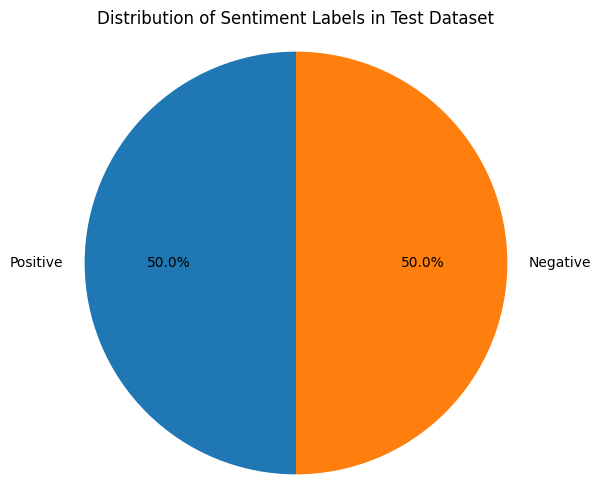

In [ ]:
import matplotlib.pyplot as plt

positive_count = sum(1 for item in data_handler.test_dataset if item['label'] == 1)
negative_count = sum(1 for item in data_handler.test_dataset if item['label'] == 0)
labels = ['Positive', 'Negative']
sizes = [positive_count, negative_count]
plt.figure(figsize=(6, 6)) # Optional: adjust figure size
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sentiment Labels in Test Dataset')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
## setting configuration
config = Hyperparameters()

##2. Preprocess data

In [ ]:
# 2. Preprocess data (Preprocessor class will be used within DataLoaderCreator)
preprocessor = Preprocessor()

##3. Build or load model

In [ ]:
# 3. Tokenize data (TokenizerWrapper class will be used within DataLoaderCreator)
tokenizer_wrapper_BERT = TokenizerWrapper(model_name=config.MODEL_NAME_BERT, max_length=config.MAX_LENGTH)


Tokenizer for bert-base-uncased loaded.


# Train By BERT

## 4. Tokenize data

In [ ]:
# 4. Tokenize data (TokenizerWrapper class will be used within DataLoaderCreator)
tokenizer_wrapper_BERT = TokenizerWrapper(model_name=config.MODEL_NAME_BERT, max_length=config.MAX_LENGTH)


Tokenizer for bert-base-uncased loaded.


##5. Create DataLoader

In [ ]:
dataloader_creator_BERT = DataLoaderCreator(tokenizer_wrapper_BERT, preprocessor)
train_loader, test_loader = dataloader_creator_BERT.create_dataloaders(
    data_handler.train_dataset,
    data_handler.test_dataset,
    config.BATCH_SIZE
)


Preprocessing and tokenizing data...


Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

DataLoaders created.


##6. Build or load model

In [ ]:
# 6. Build or load model
model_builder = ModelBuilder(model_name=config.MODEL_NAME_BERT, num_labels=config.NUM_LABELS)
bert_model = model_builder.build_model()

Building model: bert-base-uncased


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model built.


## 7. Create a training workflow, Set up hyperparameters, Train model

In [ ]:
# 7. Create a training workflow, Set up hyperparameters, Train model
BERT_trainer = TrainingWorkflow(
    model=bert_model,
    train_dataloader=train_loader,
    eval_dataloader=test_loader,
    learning_rate=config.LEARNING_RATE,
    device=config.DEVICE,
    num_epochs=config.NUM_EPOCHS
)
BERT_trainer.train()

  0%|          | 0/2346 [00:00<?, ?it/s]

  0%|          | 0/2346 [00:00<?, ?it/s]

Starting training...

--- Epoch 1/3 ---
Average Training Loss: 0.2401
Average Evaluation Loss: 0.1683
Accuracy: 0.9370
Precision: 0.9498, Recall: 0.9227, F1-score: 0.9361

--- Epoch 2/3 ---
Average Training Loss: 0.1163
Average Evaluation Loss: 0.1724
Accuracy: 0.9391
Precision: 0.9217, Recall: 0.9598, F1-score: 0.9404

--- Epoch 3/3 ---
Average Training Loss: 0.0567
Average Evaluation Loss: 0.1893
Accuracy: 0.9414
Precision: 0.9388, Recall: 0.9443, F1-score: 0.9416
Training complete.


## 8. Evaluate model (evaluation is part of the training loop)

In [ ]:
# 8. Evaluate model (evaluation is part of the training loop)
print("\nFinal evaluation on the test set:")
avg_eval_loss, accuracy, precision, recall, f1 = BERT_trainer.evaluate() # Run one last time
print(f"Average Evaluation Loss: {avg_eval_loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")


Final evaluation on the test set:
Average Evaluation Loss: 0.1893
Accuracy: 0.9414
Precision: 0.9388, Recall: 0.9443, F1-score: 0.9416


## 9. Infer model

In [ ]:
def run_inference_examples(model, tokenizer_wrapper, data_handler, config, num_runs=10):
    print("\n--- Inference Examples ---")

    inference_handler = InferenceHandler(
        model=model,
        tokenizer_wrapper=tokenizer_wrapper,
        device=config.DEVICE,
        max_length=config.MAX_LENGTH
    )

    test_review_positive = "This movie was fantastic! The acting was superb and the plot was engaging. I would highly recommend it."
    test_review_negative = "What a terrible film. I was bored from start to finish. The characters were flat and the story made no sense."

    actual_test_review_text = data_handler.test_dataset[100]['text']
    actual_test_review_label = data_handler.test_dataset[100]['label']
    actual_sentiment = "Positive" if actual_test_review_label == 1 else "Negative"

    reviews = [
        ("Positive Example", test_review_positive),
        ("Negative Example", test_review_negative),
        ("Actual Test Review", actual_test_review_text)
    ]

    for run in range(num_runs):
        print(f"\n========== Run {run+1} ==========")
        for label, review in reviews:
            result = inference_handler.predict(review)
            print(f"\n{label}")
            print(f"Original Review: {result['text'][:100]}...")
            print(f"Predicted Sentiment: {result['sentiment']} (Prob: {result['probability']:.4f})")
            if review == actual_test_review_text:
                print(f"Actual Sentiment: {actual_sentiment}")

    # Instead of config.MODEL_NAME, use tokenizer_wrapper.model_name to determine the model type.
    if "bert" in tokenizer_wrapper.model_name.lower():
        print("\n--- BERT QC Example ---")
        example_tensor = torch.ones(1, config.MAX_LENGTH, device=config.DEVICE).type(torch.long)
        qc_output = model(example_tensor)
        print("BERT QC Output:", qc_output.logits)

    elif "xlnet" in tokenizer_wrapper.model_name.lower():
        print("\n--- XLNet QC Example ---")
        example_tensor = torch.ones(1, config.MAX_LENGTH, device=config.DEVICE).type(torch.long)
        qc_output = model(example_tensor)
        print("XLNet QC Output:", qc_output.logits)

In [ ]:
# RUn inference examples.
run_inference_examples(bert_model, tokenizer_wrapper_BERT, data_handler, config)


--- Inference Examples ---

========== Run 1 ==========

Positive Example
Original Review: This movie was fantastic! The acting was superb and the plot was engaging. I would highly recommend ...
Predicted Sentiment: Positive (Prob: 0.9974)

Negative Example
Original Review: What a terrible film. I was bored from start to finish. The characters were flat and the story made ...
Predicted Sentiment: Negative (Prob: 0.0023)

Actual Test Review
Original Review: "Cover Girl" is a lacklustre WWII musical with absolutely nothing memorable about it, save for its s...
Predicted Sentiment: Negative (Prob: 0.0021)
Actual Sentiment: Negative

========== Run 2 ==========

Positive Example
Original Review: This movie was fantastic! The acting was superb and the plot was engaging. I would highly recommend ...
Predicted Sentiment: Positive (Prob: 0.9974)

Negative Example
Original Review: What a terrible film. I was bored from start to finish. The characters were flat and the story made ...
Predicted 

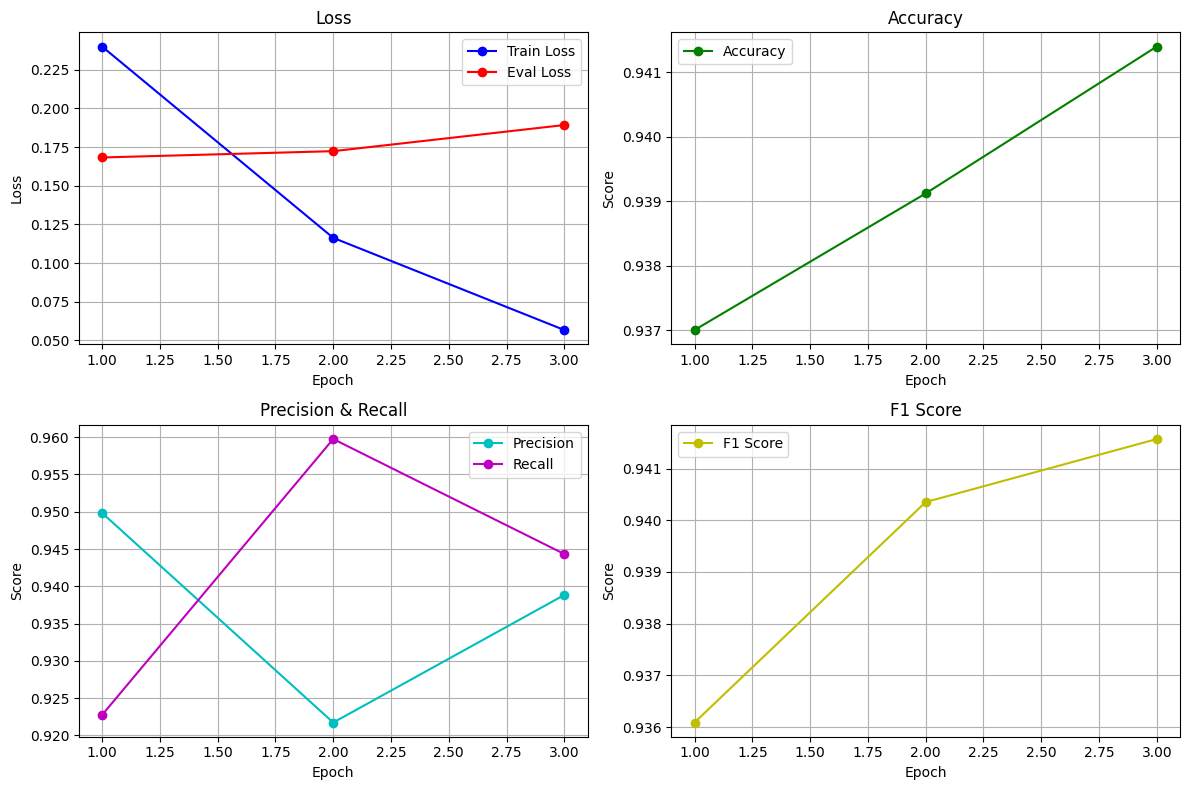

In [ ]:
BERT_trainer.plot_metrics()

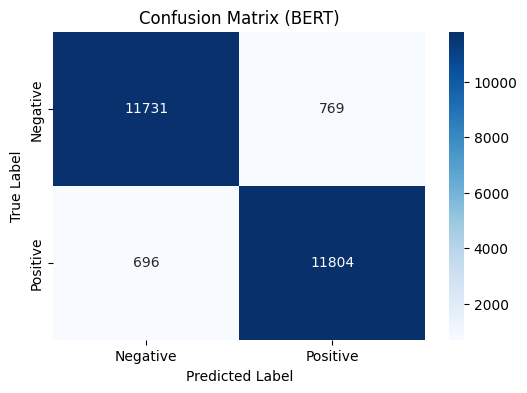

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
bert_model.eval()
all_bert_preds = []
all_bert_labels = []
with torch.no_grad():
    for batch in BERT_trainer.eval_dataloader:
        input_ids = batch['input_ids'].to(BERT_trainer.device)
        attention_mask = batch['attention_mask'].to(BERT_trainer.device)
        labels = batch['labels'].to(BERT_trainer.device).unsqueeze(1)

        outputs = BERT_trainer.model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.sigmoid(logits) > 0.5
        all_bert_preds.extend(preds.cpu().numpy())
        all_bert_labels.extend(batch['labels'].cpu().numpy())
cm_bert = confusion_matrix(all_bert_labels, all_bert_preds)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_bert, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (BERT)')
plt.show()

# Train BY  XLNET

## 3. Tokenize data (TokenizerWrapper class will be used within DataLoaderCreator)

In [ ]:
# 3. Tokenize data (TokenizerWrapper class will be used within DataLoaderCreator)
tokenizer_wrapper_XLNET = TokenizerWrapper(model_name=config.MODEL_NAME_XLNET, max_length=config.MAX_LENGTH)


Tokenizer for xlnet-base-cased loaded.


## 4. Tokenize data (TokenizerWrapper class will be used within DataLoaderCreator)

In [ ]:
# 4. Tokenize data (TokenizerWrapper class will be used within DataLoaderCreator)
tokenizer_wrapper_XLNET = TokenizerWrapper(model_name=config.MODEL_NAME_XLNET, max_length=config.MAX_LENGTH)

Tokenizer for xlnet-base-cased loaded.


##5. Create DataLoader

In [ ]:
# 5. Create DataLoader
dataloader_creator_XLNET  = DataLoaderCreator(tokenizer_wrapper_XLNET, preprocessor)
train_loader, test_loader = dataloader_creator_XLNET.create_dataloaders(
    data_handler.train_dataset,
    data_handler.test_dataset,
    config.BATCH_SIZE
)

Preprocessing and tokenizing data...


Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

DataLoaders created.


## 6. Build or load model

In [ ]:
# 6. Build or load model
model_builder = ModelBuilder(model_name=config.MODEL_NAME_XLNET, num_labels=config.NUM_LABELS)
xlnet_model = model_builder.build_model()

Building model: xlnet-base-cased


Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.bias', 'logits_proj.weight', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model built.


##7. Create a training workflow, Set up hyperparameters, Train model

In [ ]:
# 7. Create a training workflow, Set up hyperparameters, Train model
XLNET_trainer = TrainingWorkflow(
    model=xlnet_model,
    train_dataloader=train_loader,
    eval_dataloader=test_loader,
    learning_rate=config.LEARNING_RATE,
    device=config.DEVICE,
    num_epochs=config.NUM_EPOCHS
)
XLNET_trainer.train()

  0%|          | 0/4689 [00:00<?, ?it/s]

  0%|          | 0/4689 [00:00<?, ?it/s]

Starting training...

--- Epoch 1/3 ---
Average Training Loss: 0.1895


## 8. Evaluate model (evaluation is part of the training loop)

In [ ]:
# 8. Evaluate model (evaluation is part of the training loop)
print("\nFinal evaluation on the test set:")
avg_eval_loss, accuracy, precision, recall, f1 = XLNET_trainer.evaluate() # Run one last time
print(f"Average Evaluation Loss: {avg_eval_loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

## 9. Infer model

In [ ]:
run_inference_examples(xlnet_model, tokenizer_wrapper_XLNET, data_handler, config)

In [ ]:
XLNET_trainer.plot_metrics()

In [ ]:



# For the trained XLNET model:
print("\nConfusion Matrix for XLNet Model:")
# Re-evaluate to get the predictions on the test set
xlnet_eval_loss, xlnet_accuracy, xlnet_precision, xlnet_recall, xlnet_f1 = XLNET_trainer.evaluate() # Assuming this also updates XLNET_trainer.all_preds and XLNET_trainer.all_labels

# A simple way to get the preds and labels specifically for the confusion matrix after training is:
xlnet_model.eval()
all_xlnet_preds = []
all_xlnet_labels = []
with torch.no_grad():
    for batch in XLNET_trainer.eval_dataloader:
        input_ids = batch['input_ids'].to(XLNET_trainer.device)
        attention_mask = batch['attention_mask'].to(XLNET_trainer.device)
        labels = batch['labels'].to(XLNET_trainer.device).unsqueeze(1)

        outputs = XLNET_trainer.model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.sigmoid(logits) > 0.5
        all_xlnet_preds.extend(preds.cpu().numpy())
        all_xlnet_labels.extend(batch['labels'].cpu().numpy())

# Compute the confusion matrix
cm_xlnet = confusion_matrix(all_xlnet_labels, all_xlnet_preds)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xlnet, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (XLNet)')
plt.show()



# For both BERT - XLNet and vietnamese texts (this homework) and english texts (previous homework):

- Are there any differences in the evaluating performance in applying those 2 models for 2 datasets, i.e., vietnamese and english ? Analyze and visualize your results to prove your conclusion.

- How to improve the weaker approaches ?

### with BERT Model:

###### Are there any differences in the evaluating performance in applying those 2 models for 2 datasets, i.e., vietnamese and english ? Analyze and visualize your results to prove your conclusion.

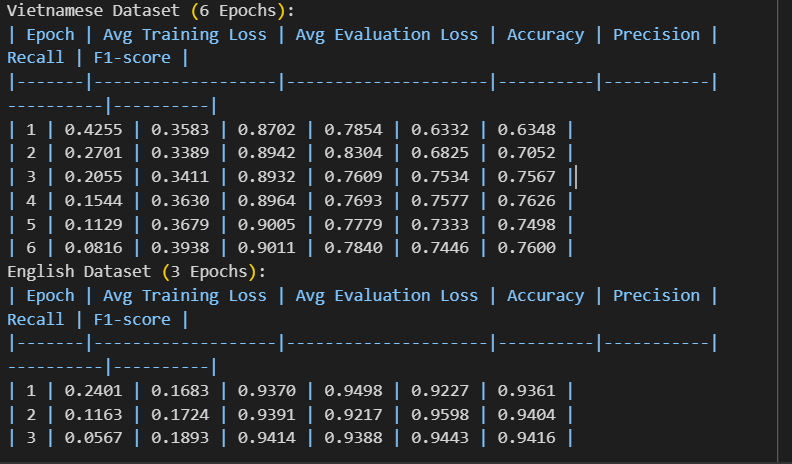

English: Achieved a higher peak F1-score (0.9416) and Accuracy (0.9414) compared to Vietnamese.
Vietnamese: Achieved a peak F1-score of 0.7626 (Epoch 4) and Accuracy of 0.9011 (Epoch 6).


- English: The evaluation loss started to slightly increase from Epoch 2 (0.1724) to Epoch 3 (0.1893), even though training loss decreased. This is a very mild sign of potential overfitting, but the F1-score and Accuracy still improved. The model appears robust.
- Vietnamese: This is more pronounced.
The lowest evaluation loss was at Epoch 2 (0.3389).
After Epoch 2, the evaluation loss consistently increased (0.3411, 0.3630, 0.3679, 0.3938) while the training loss continued to decrease. This is a clear indication of overfitting. The model was learning the training data too well and losing its ability to generalize to unseen evaluation data.
The best F1-score (0.7626) was achieved at Epoch 4, even though the evaluation loss was already higher than at Epoch 2. Accuracy peaked at Epoch 6, but this might be misleading given the increasing evaluation loss and fluctuating F1-score.

Metric Stability:
- English: Metrics were relatively stable and consistently high.
- Vietnamese: While accuracy generally trended upwards, Precision, Recall, and F1-score showed more fluctuation, especially after the onset of overfitting. The F1-score peaked at Epoch 4 (0.7626) and then slightly dropped.